In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [6]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df1 = df.drop(['availability', 'society'], axis = 1)
balcony_mean = df1.balcony.mean()
df1.balcony.fillna(balcony_mean, inplace=True)
df1.dropna(subset=['size','location'], inplace=True)

In [4]:
df2 = df1.copy()
df2['bedroom'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df2.bath.fillna(df2['bedroom']+2, inplace=True)

In [5]:
def price_psf(sf):
    x = sf.split('-')
    if len(x) == 2:
        return (float(x[0]) + float(x[1]))/2
    try:
        return float(sf)
    except:
        return None

In [6]:
df3 = df2.copy()
df3['total_sqft'] = df['total_sqft'].apply(lambda x: price_psf(x))
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [7]:
df4 = df3.copy()
df4['ppsf'] = df4['price']*100000 / df4['total_sqft']
df4['sfpb'] = df4['total_sqft'] / df4['bedroom']

In [8]:
df5 = df4.copy()
location_count = df5.location.value_counts()
location_count_10 = location_count[location_count <= 10]
df5.location = df5.location.apply(lambda x: 'other' if x in location_count_10 else x)

In [9]:
total_sqft = df5.total_sqft
total_sqft_x = total_sqft[total_sqft <= 50]
#df5.total_sqft = df5.total_sqft.apply(lambda x: float(x))

In [10]:
df6 = df5.copy()
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.ppsf)
        st = np.std(subdf.ppsf)
        reduced_df = subdf[(subdf.ppsf>(m- 1.5 *st)) & (subdf.ppsf<=(m+ 1.5 *st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    df_new = pd.DataFrame()
    for key, subdf in df_out.groupby('location'):
        m = np.mean(subdf.sfpb)
        st = np.std(subdf.sfpb)
        reduced_df = subdf[(subdf.sfpb>(m- 1.5 *st)) & (subdf.sfpb<=(m+ 1.5 *st))]
        df_new = pd.concat([df_new,reduced_df],ignore_index=True)
    return df_new
df7 = remove_pps_outliers(df6)
df7.shape


(11408, 10)

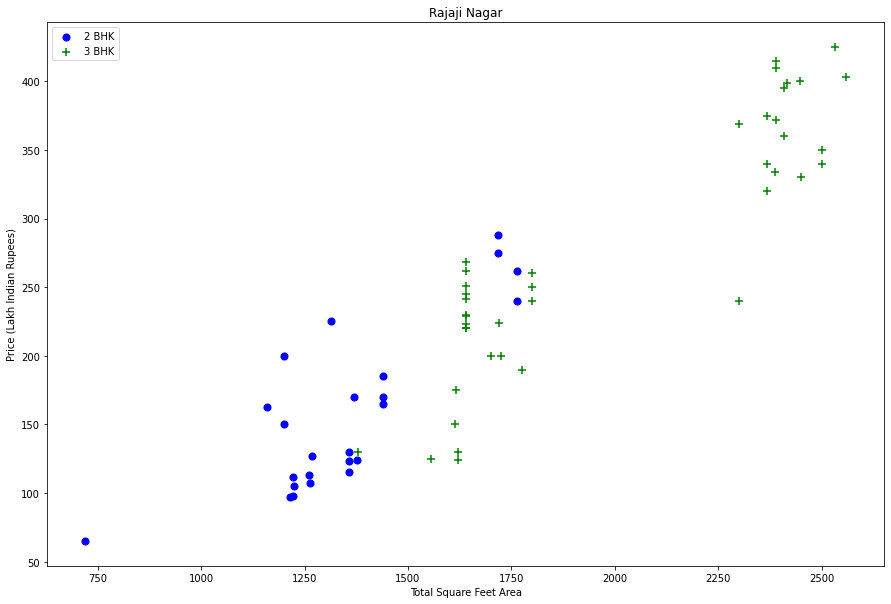

In [15]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bedroom==2)]
    bhk3 = df[(df.location==location) & (df.bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

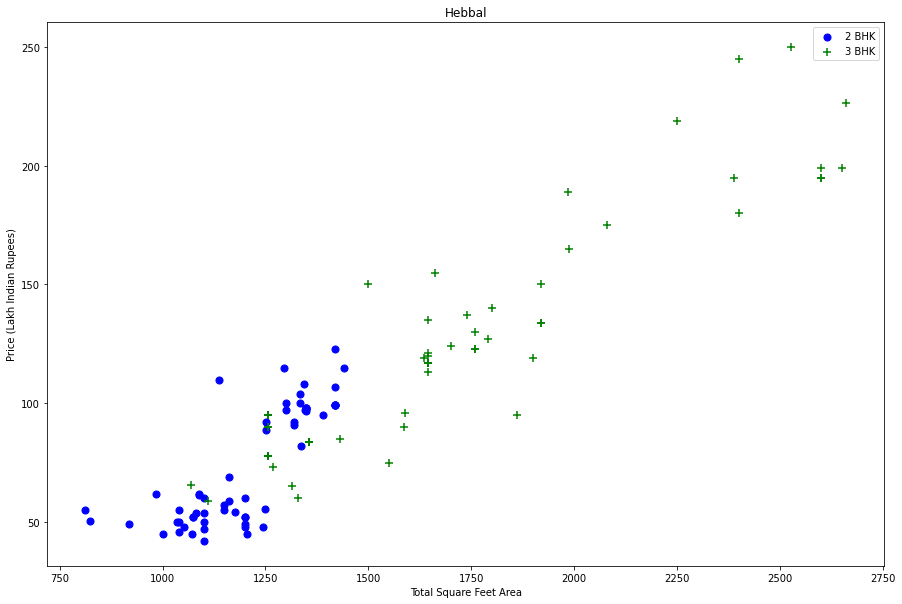

In [16]:
plot_scatter_chart(df7,"Hebbal")

In [11]:
df5

,area_type,location,size,total_sqft,bath,balcony,price,bedroom,ppsf,sfpb
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.000000,39.07,2,3699.810606,528.00
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.000000,120.00,4,4615.384615,650.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.000000,62.00,3,4305.555556,480.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.000000,95.00,3,6245.890861,507.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.000000,51.00,2,4250.000000,600.00
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.000000,231.00,5,6689.834926,690.60
13316,Super built-up Area,other,4 BHK,3600.0,5.0,1.584376,400.00,4,11111.111111,900.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.000000,60.00,2,5258.545136,570.50
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.000000,488.00,4,10407.336319,1172.25


In [4]:
!git get https://github.com/codebasics/py/blob/master/DataScience/BangloreHomePrices/model/banglore_home_prices_final.ipynb


git: 'get' is not a git command. See 'git --help'.

The most similar command is
	grep
